In [19]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob



In [23]:
objPoints = []
imgPoints = []

objp = np.zeros((6*8, 3), np.float32)
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

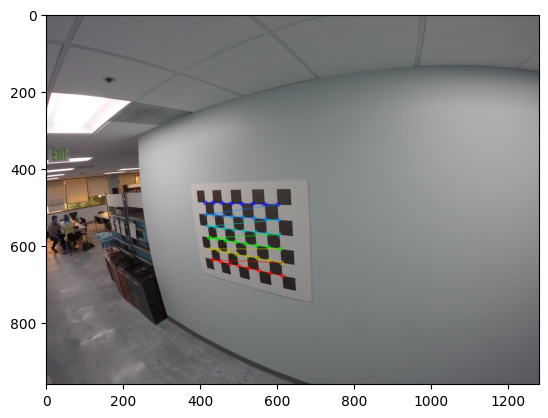

In [25]:
images_path = "calibration_wide/GOPR*.jpg"
images_names = glob.glob(images_name)
for name in images_names:
    image = cv2.imread(name)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(image, (8,6), None)
    if ret:
        imgPoints.append(corners)
        objPoints.append(objp)
        image = cv2.drawChessboardCorners(image, (8,6), corners, ret)
        plt.imshow(image)
        

In [34]:
def undestor_img(image, objPoints, imgPoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, image.shape[1::-1], None, None)
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    return dst

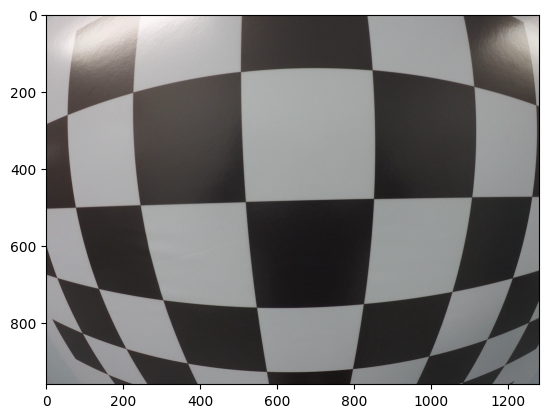

In [37]:
test_image = cv2.imread("calibration_wide/test_image.jpg")
plt.imshow(test_image)


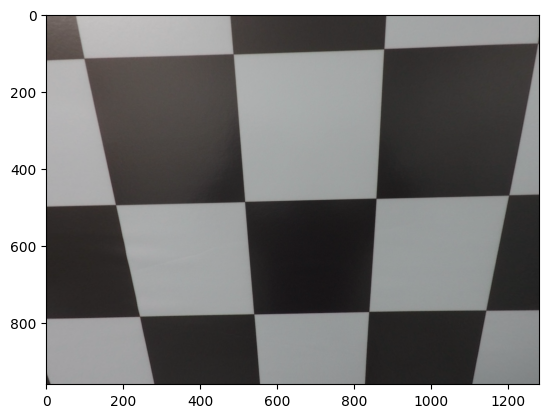

In [38]:
u_image = undestor_img(test_image, objPoints, imgPoints)
plt.imshow(u_image)